In [14]:
import numpy as num

# 

# import openpyxl
# 
# try:
#     workbook = openpyxl.load_workbook("dataset/Graphs_August_ADWR_cleaned.xlsx")
#     sheet = workbook.active
#     # Fai qualcosa con il tuo foglio Excel
# except FileNotFoundError:
#     print("Il file non è stato trovato.")
# except Exception as e:
#     print(f"Si è verificato un errore: {e}")
# 

import pandas as pd

try:
# Carica il tuo file XLSX
    xlsx_file = 'dataset/Data.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")

print(df)


    Porosity     SSA      Ech  Tortuosity          k_m2
0      0.137   5.065  -25.849      2.0340  1.473350e-12
1      0.147   5.253  -31.002      2.6650  2.254724e-12
2      0.131   4.697  -20.047      2.1090  9.543177e-12
3      0.115   5.583  -50.613      4.1830  9.664920e-13
4      0.139   7.447 -136.737      2.5950  9.180783e-13
5      0.115   5.311  -32.907      4.1010  1.435774e-12
6      0.134   6.990 -115.218      2.7740  4.010302e-13
7      0.138   7.132 -110.411      2.7790  3.937021e-12
8      0.116   5.290  -39.748      3.8680  1.933907e-12
9      0.020   0.791   -3.948      3.1000  3.021802e-13
10     0.020   0.806   -2.017      2.9000  3.190436e-13
11     0.273   7.721 -102.424      1.7170  5.516051e-11
12     0.250   6.870  -76.478      1.3530  3.822390e-11
13     0.265   7.560  -95.050      1.5730  5.275967e-11
14     0.250   7.353 -152.126      1.3400  2.009570e-11
15     0.281   8.363 -258.282      1.3720  1.319490e-10
16     0.297   9.123 -362.849      1.6750  8.289

In [2]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Esempio di modello
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
import xgboost as xgb 


#Imputa i valori mancanti con valori plausibili
imputer = KNNImputer(n_neighbors=50)  # Puoi scegliere una strategia diversa, come 'median' o 'most_frequent'
# Applica l'imputazione al dataset completo
imputed_data = imputer.fit_transform(df)

# Crea un nuovo DataFrame con i dati imputati
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

print(df_imputed)



    Vol. mm^3  Porosity   Porosity .1        SSA     Conn. D     Por_x  \
0   23.328000   0.205000    20.500000  45.892683  310.913000  0.137000   
1   23.328000   0.176000    17.600000  54.744318  350.137000  0.115000   
2   23.328000   0.184000    18.400000  53.413043  368.141000  0.134000   
3   23.328000   0.188000    18.800000  54.553191  370.756000  0.087792   
4   23.328000   0.200000    20.000000  55.770000  505.186000  0.087792   
5   27.993600   0.000000     0.000000  57.790565  256.186037  0.000000   
6   17.496000   0.000000     0.000000  57.790565  256.186037  0.000000   
7   34.992000   0.020000     2.000000  45.650000   10.573000  0.020000   
8   43.740000   0.238000    23.800000  47.319328  518.541000  0.087792   
9   43.740000   0.274000    27.400000  36.324818  458.436000  0.273000   
10  43.740000   0.293000    29.300000  34.412969  607.796000  0.250000   
11  43.740000   0.296000    29.600000  34.449324  553.612000  0.087792   
12  43.740000   0.235000    23.500000 

In [3]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

#Standardizza i dati con lo scaler
scaler = StandardScaler()  

scaled_data = scaler.fit_transform(df_imputed)

df_scaled = pd.DataFrame(scaled_data, columns=df_imputed.columns)

# In questo esempio, consideriamo che 'kx', 'ky', e 'kz' siano le colonne target.
features_X = df_scaled.drop(['kx'], axis=1)  # Features (tutte le colonne tranne 'kx', 'ky', e 'kz')
targets_X = df_scaled[['kx']]  # Colonne target

features_Y = df_scaled.drop(['ky'], axis=1)  # Features (tutte le colonne tranne 'kx', 'ky', e 'kz')
targets_Y = df_scaled[['ky']]  # Colonne target

features_Z = df_scaled.drop(['kz'], axis=1)  # Features (tutte le colonne tranne 'kx', 'ky', e 'kz')
targets_Z = df_scaled[['kz']]  # Colonne target
# Suddivisione del dataset in set di addestramento e test

#TODO provare con 0.7 - 30  o  0.7 - 20
features_X_train, features_X_test, targets_X_train, targets_X_test = train_test_split(features_X, targets_X, test_size=0.3, random_state=42)
features_Y_train, features_Y_test, targets_Y_train, targets_Y_test = train_test_split(features_Y, targets_Y, test_size=0.3, random_state=42)
features_Z_train, features_Z_test, targets_Z_train, targets_Z_test = train_test_split(features_Z, targets_Z, test_size=0.3, random_state=42)

classifiers = {
    # 
    # 'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    # 'XGBoost': xgb.XGBClassifier(),
}  # Lista dei modelli di classificazione

model_kx = LinearRegression()
model_ky = LinearRegression()
model_kz = LinearRegression()

model_kx.fit(features_X_train, targets_X_train)
predict_kx = model_kx.predict(features_X_test)
mse_kx = mean_squared_error(targets_X_test, predict_kx)

model_ky.fit(features_Y_train, targets_Y_train)
predict_ky = model_ky.predict(features_Y_test)
mse_ky = mean_squared_error(targets_Y_test, predict_ky)

model_kz.fit(features_Z_train, targets_Z_train)
predict_kz = model_kz.predict(features_Z_test)
mse_kz = mean_squared_error(targets_Z_test, predict_kz)

print (predict_kx)
print (predict_ky)
print (predict_kz)

#Itera sulla lista dei modelli da provare
# for name, classifier in classifiers.items():
#         #Addestro il modello
#     classifier.fit(features_X_train, targets_X_train)
#     #Calcolo l'accuratezza del modello
#     predict = classifier.predict(features_X_test)
#         
#     #Stampo i risultati
#     print(f"Modello: {name}")
# print(f'Classification Report: \n {classification_report(targets_X_test, predict)}\n')KNeighborsClassifier()

[[-0.335408  ]
 [-0.36360527]
 [-0.1609766 ]
 [-0.46846919]
 [-0.0135574 ]
 [ 2.894872  ]
 [-0.31093808]
 [ 0.18749495]
 [ 0.14046905]]
[[-0.27979381]
 [-0.31955525]
 [-0.34633441]
 [-0.32430908]
 [-0.01515904]
 [ 1.45194217]
 [-0.26244926]
 [-0.18714738]
 [ 0.25983289]]
[[-0.35825197]
 [-0.37904733]
 [-0.23488463]
 [-0.421399  ]
 [ 0.00954186]
 [ 1.8705776 ]
 [-0.4134896 ]
 [-0.08922114]
 [ 0.21882025]]


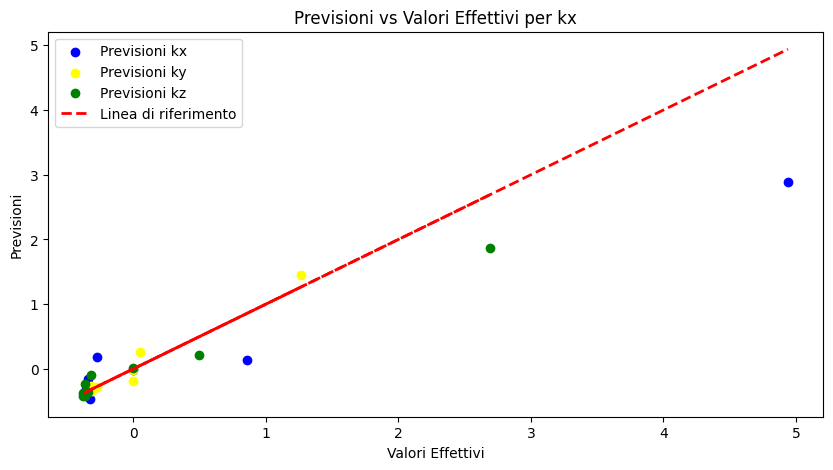

In [4]:
#Plotting dei risultati

import matplotlib.pyplot as plt

# Plotta le previsioni rispetto ai valori effettivi per kx
plt.figure(figsize=(10, 5))

plt.scatter(targets_X_test['kx'], predict_kx, color='blue', label='Previsioni kx')
plt.plot([targets_X_test['kx'].min(), targets_X_test['kx'].max()], [targets_X_test['kx'].min(), targets_X_test['kx'].max()], color='red', linestyle='--', lw=2)

plt.scatter(targets_Y_test['ky'], predict_ky, color='yellow', label='Previsioni ky')
plt.plot([targets_Y_test['ky'].min(), targets_Y_test['ky'].max()], [targets_Y_test['ky'].min(), targets_Y_test['ky'].max()], color='red', linestyle='--', lw=2)

plt.scatter(targets_Z_test['kz'], predict_kz, color='green', label='Previsioni kz')
plt.plot([targets_Z_test['kz'].min(), targets_Z_test['kz'].max()], [targets_Z_test['kz'].min(), targets_Z_test['kz'].max()], color='red', linestyle='--', lw=2, label='Linea di riferimento')

plt.title('Previsioni vs Valori Effettivi per kx')
plt.xlabel('Valori Effettivi')
plt.ylabel('Previsioni')
plt.legend()
plt.show()


In [5]:
#Ora vorrei un'analisi più approfondita dei risultati 

print(f"Mean square error Kx : {mse_kx} ")
print(f"Mean square error Ky : {mse_ky} ")
print(f"Mean square error Kz : {mse_kz} ")


Mean square error Kx : 0.5518142250819528 
Mean square error Ky : 0.013390206869081172 
Mean square error Kz : 0.09142898298476715 


In [6]:
from sklearn.metrics import r2_score

#Calcolare il coefficiente di determinazione R^2
r2_x = r2_score(targets_X_test, predict_kx)
r2_y = r2_score(targets_Y_test, predict_ky)
r2_z = r2_score(targets_Z_test, predict_kz)
print(f"R^2 Kx : {r2_x } ")
print(f"R^2 Ky : {r2_y} ")
print(f"R^2 Kz : {r2_z} ")

#Calcolare il coefficiente di determinazione Root mean square error
rmse_x = num.sqrt(mse_kx)
rmse_y = num.sqrt(mse_ky)
rmse_z = num.sqrt(mse_kz)

print(f"RMSE Kx : {rmse_x} ")
print(f"RMSE Ky : {rmse_y} ")
print(f"RMSE Kz : {rmse_z} ")

#Calcolare il coefficiente di determinazione Mean absolute error
from sklearn.metrics import mean_absolute_error

mae_x = mean_absolute_error(targets_X_test, predict_kx)
mae_y = mean_absolute_error(targets_Y_test, predict_ky)
mae_z = mean_absolute_error(targets_Z_test, predict_kz)

print(f"MAE Kx : {mae_x} ")
print(f"MAE Ky : {mae_y} ")
print(f"MAE Kz : {mae_z} ")



R^2 Kx : 0.7946420930412993 
R^2 Ky : 0.9417063062331595 
R^2 Kz : 0.8987815901606336 
RMSE Kx : 0.7428419920023052 
RMSE Ky : 0.11571606141362215 
RMSE Kz : 0.3023722589537062 
MAE Kx : 0.4021304819201956 
MAE Ky : 0.07908369501285621 
MAE Kz : 0.17551343379875656 


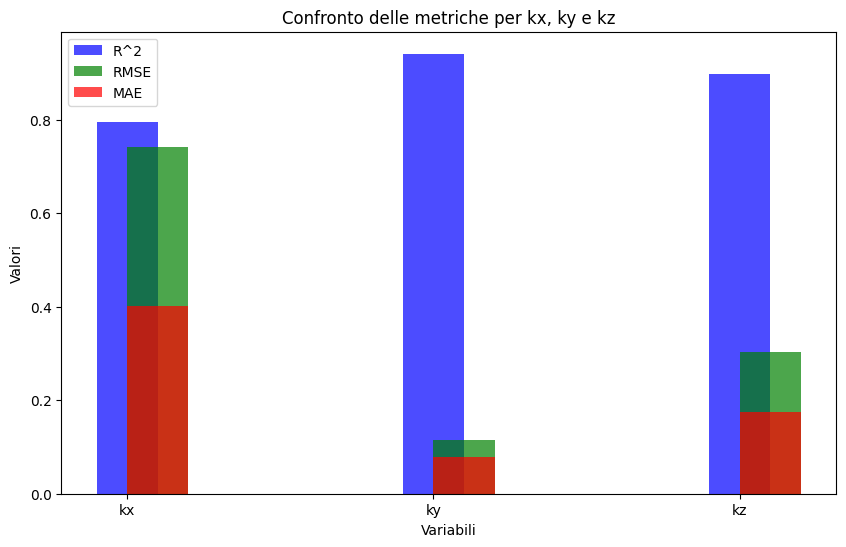

In [7]:
#Plotting dei risultati

import matplotlib.pyplot as plt

# Dati delle metriche
r2_scores = [r2_x, r2_y, r2_z]
rmse_values = [rmse_x, rmse_y, rmse_z]
mae_values = [mae_x, mae_y, mae_z]
variables = ['kx', 'ky', 'kz']

# Crea il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i risultati R^2
ax.bar(variables, r2_scores, width=0.2, label='R^2', align='center', alpha=0.7, color='b')

# Plotta i risultati RMSE
ax.bar(variables, rmse_values, width=0.2, label='RMSE', align='edge', alpha=0.7, color='g')

# Plotta i risultati MAE
ax.bar(variables, mae_values, width=0.2, label='MAE', align='edge', alpha=0.7, color='r')

# Aggiungi legenda
ax.legend()

# Etichetta degli assi
ax.set_xlabel('Variabili')
ax.set_ylabel('Valori')

# Titolo del grafico
ax.set_title('Confronto delle metriche per kx, ky e kz')

# Visualizza il grafico
plt.show()


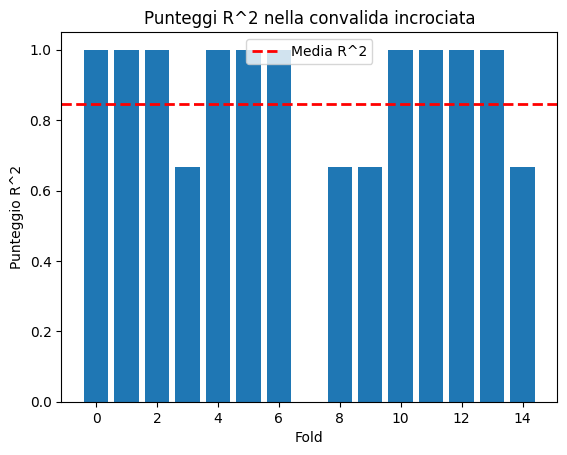

In [8]:
#Validazione dei dati dello stesso dataset con cross validation k-fold (16 fold sono ottimali per una buona validazione)

from sklearn.model_selection import cross_val_score

# Crea il modello
model = LinearRegression()
targets = df_imputed[['kx', 'ky', 'kz']]
# Esegui la convalida incrociata a k-fold con k=5 (puoi scegliere il valore di k)
scores = cross_val_score(model, df_imputed, targets, cv=15, scoring='r2')
# Puoi anche utilizzare 'neg_mean_absolute_error' per MAE o 'neg_root_mean_squared_error' per RMSE

# Calcola la media dei punteggi R^2
mean_r2 = scores.mean()

# Plotta i punteggi R^2 ottenuti in ciascun fold
plt.bar(range(len(scores)), scores)
plt.xlabel('Fold')
plt.ylabel('Punteggio R^2')
plt.title('Punteggi R^2 nella convalida incrociata')
plt.axhline(mean_r2, color='red', linestyle='dashed', linewidth=2, label='Media R^2')
plt.legend()
plt.show()

In [9]:
#Allenamento modello con ElasticNet
#TODO: da sistemare -> VOGLIO SEMPLICEMENTE AGGIUNGERE UN MODELLO DI ALLENAMENTO.
#PUò ESSERE IMPLEMENTATO SINGOLARMENTE QUI, OPPURE TORNARE NELLA PRIMA FASE DI ALLENAMENTO E GENERARE UN CICLO CHE ALLENA I MODELLI PER LO STESSO DATASET
#IN UNA LISTA DI MODELLI, E POI STAMPARE I RISULTATI DI TUTTI I MODELLI IN UN GRAFICO A BARRE


from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Crea un'istanza del modello Elastic Net
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Iperparametri alpha e l1_ratio possono essere regolati

# Addestra il modello sui dati di addestramento
elastic_net.fit(features_X_train, targets_X_train)
elastic_net.fit(features_Y_train, targets_Y_train)
elastic_net.fit(features_Z_train, targets_Z_train)

# Fai previsioni con il modello
predictions_elastic_X = elastic_net.predict(features_X_test)
predictions_elastic_Y = elastic_net.predict(features_Y_test)
predictions_elastic_Z = elastic_net.predict(features_Z_test)

print(f"R^2 Kx : {r2_score(targets_X_test, predictions_elastic_X)} ")
print(f"R^2 Ky : {r2_score(targets_Y_test, predictions_elastic_Y)} ")
print(f"R^2 Kz : {r2_score(targets_Z_test, predictions_elastic_Z)} ")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- kz
Feature names seen at fit time, yet now missing:
- kx


Using downloaded and verified file: C:\Users\loris\drd_data\Berea_2d25um_grayscale.raw


ValueError: 'c' argument has 1000000000 elements, which is inconsistent with 'x' and 'y' with size 1000.

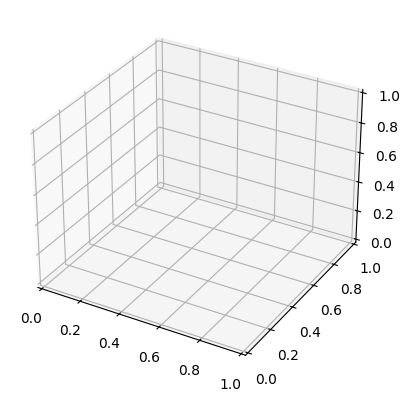

In [10]:
#Qui inizio a caricare il dataset Berea SandStones
#Libreria 'drd' by @Lukas Mosser
import matplotlib.pyplot as plot
from drd.datasets.eleven_sandstones import load_eleven_sandstones

# xarray DataArray with image data
img = load_eleven_sandstones("Berea", "Berea_2d25um_grayscale.raw") 

# Estrai i dati dal dataset
data = img.values

# Crea una griglia 3D per i punti (x, y, z)
x, y, z = img.x, img.y, img.z

# Normalizza i dati in modo che siano compresi tra 0 e 1
norm_data = (data - data.min()) / (data.max() - data.min())

# Crea una figura 3D
figure = plot.figure()
ax = figure.add_subplot(111, projection='3d')

# Plotta i dati in 3D con la colormap
sc = ax.scatter(x, y, z, c=norm_data, cmap='viridis')

# Aggiungi una barra dei colori
cbar = figure.colorbar(sc)


ax = figure.add_subplot(111, projection='3d')

# Plotta i dati in 3D
ax.scatter(x, y, z, c=data, cmap='viridis')  # Puoi scegliere la colormap che preferisci

# Aggiungi etichette agli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



In [ ]:
#Ora vorrei salvare il modello addestrato e riutilizzarlo
import pickle

#Salvo il modello
pickle.dump(model_kx, open('model_kx.pkl', 'wb'))
pickle.dump(model_ky, open('model_ky.pkl', 'wb'))
pickle.dump(model_kz, open('model_kz.pkl', 'wb'))


In [ ]:
#Carico il modello
model_kx = pickle.load(open('model_kx.pkl', 'rb'))
model_ky = pickle.load(open('model_ky.pkl', 'rb'))
model_kz = pickle.load(open('model_kz.pkl', 'rb'))


In [ ]:
#Utilizzo il modello per fare previsioni
#Prendo un esempio dal dataset
example = df_imputed.iloc[0]

#Prendo solo le features
example = example.drop(['kx', 'ky', 'kz'])

#Prendo solo i valori
example = example.values.reshape(1, -1)

#Prendo le previsioni
prediction = model_kx.predict(example)

#Stampo le previsioni
print(f"Previsioni: {prediction}")
